# 📓 Notebook 1: Introduction to Pandas, Scikit-learn and Matplotlib

In this notebook we will explore three fundamental libraries for working in the field of **Machine Learning with Python**:

- `pandas`: for data handling  
- `scikit-learn`: for loading the dataset and computing metrics  
- `matplotlib`: for graphical visualization  

We will use **Taiwan Air Quality Index Data 2016~2024** to make first dataset analysis.


But fist, let's mount our Drive and set the working directory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

cwd = 'drive/MyDrive/...' # Set your current working directory where the csv file is located

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Importing libraries and loading the airquality dataset  
**Column description** in `air_quality.csv` (25 in total):

- date: date and time of the measurement (e.g. “2024-08-31 23:00”)  
- sitename, county, siteid: details about the monitoring station  
- aqi: Air Quality Index, continuous target for possible regression  
- pollutant: main pollutant
- status: qualitative classification (Good→5 … Hazardous→0)  
- so2, co, o3, o3_8hr, co_8hr, no2, nox, no, pm10, pm2.5: instant and 8-hour average pollutants' concentrations  
- pm10_avg, pm2.5_avg, so2_avg: moving average of the main pollutants  
- windspeed, winddirec: wind speed and direction  
- longitude, latitude: geographical coordinates  

At the end of this block, we check dimensions, take a first look at data types, and percentages of missing values.


In [ ]:
# Import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Check if file exists
file_path = cwd + '/air_quality.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The CSV file was not found at the path: {file_path}")

# Loading dataset with read_csv (first 100000 rows in this case)
df = pd.read_csv(file_path,low_memory=False, na_values=['-', 'NA','ND', 'n/a', ''], nrows=1000000)  # Remove nrows to load the entire dataset

## 2. Dataset Exploration  
Let's look at some basic information about the dataset:  
- Dimensions (rows, columns),  
- First rows of the file,  
- Data types per column,  
- Descriptive statistics,  
- Missing values.
- Plot to show the distribution of the numerical columns:
We get a grid of histograms, one for each numerical column of the DataFrame.


Original dataset size: (1000000, 25)

First 5 rows of the dataset:
               date   sitename          county   aqi pollutant    status  so2  \
0  2024-08-31 23:00      Hukou  Hsinchu County  62.0     PM2.5  Moderate  0.9   
1  2024-08-31 23:00  Zhongming   Taichung City  50.0       NaN      Good  1.6   
2  2024-08-31 23:00    Zhudong  Hsinchu County  45.0       NaN      Good  0.4   
3  2024-08-31 23:00    Hsinchu    Hsinchu City  42.0       NaN      Good  0.8   
4  2024-08-31 23:00     Toufen   Miaoli County  50.0       NaN      Good  1.0   

     co    o3  o3_8hr  ...  windspeed  winddirec  unit  co_8hr  pm2.5_avg  \
0  0.17  35.0    40.2  ...        2.3      225.0   NaN     0.2       20.1   
1  0.32  27.9    35.1  ...        1.1      184.0   NaN     0.2       15.3   
2  0.17  25.1    40.6  ...        0.4      210.0   NaN     0.2       13.8   
3  0.20  30.0    35.9  ...        1.9      239.0   NaN     0.2       13.0   
4  0.16  33.5    35.9  ...        1.8      259.0   NaN     0.

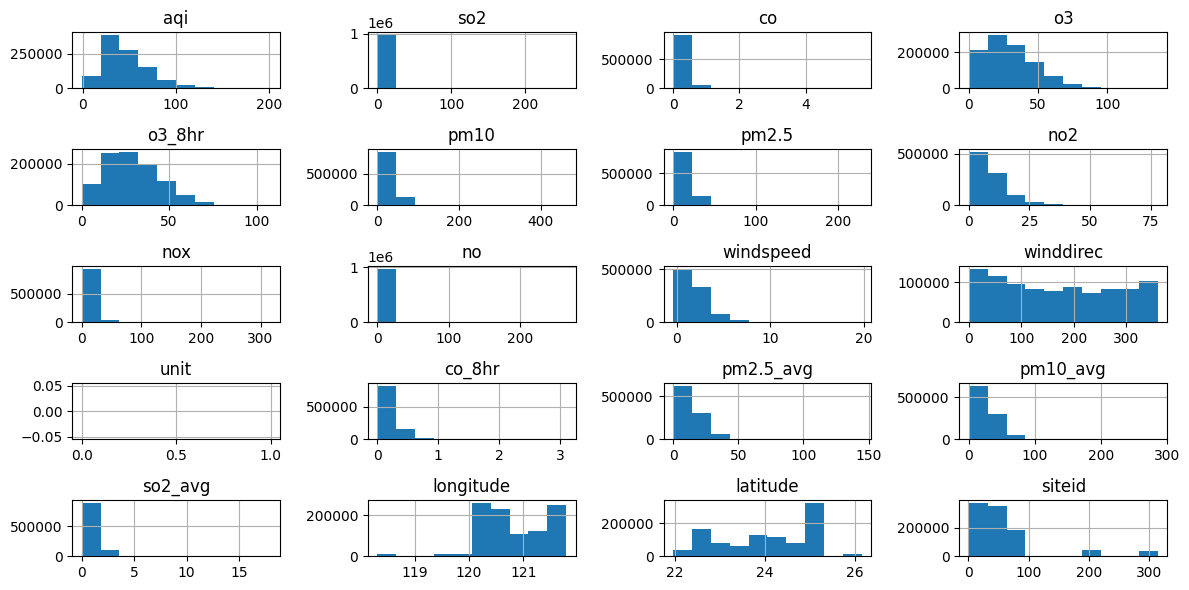

In [ ]:
print(f"Original dataset size: {df.shape}")

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe(include='all'))

print("\nDistribution of numerical columns:")
df.hist(figsize=(12,6)) # Here the dataframe create a plot using matplot lib. The next rows set how to show the plots
plt.tight_layout() # Better layout
plt.show() # Shows the plot

## 3. Data Cleaning  
Data preprocessing is a fundamental step. We start by removing completely empty columns, then convert numerical columns, and finally drop rows with missing values in key columns.


In [ ]:
# Removal of completely empty columns
df = df.dropna(axis=1, how='all')

print("\nPercentage of missing values per column (after dropping empty columns):")
print(df.isnull().mean() * 100)
print(f"Dataset size (should be the original size): {df.shape}\n\n")

df.dropna(subset='status', inplace=True) # Remove the rows where status has missing values
print(df.isnull().mean() * 100)
print(f"Final dataset size after removing rows where status has missing values: {df.shape}")


Percentage of missing values per column (after dropping empty columns):
date          0.0000
sitename      0.0000
county        0.0000
aqi           0.0348
pollutant    63.8986
status        0.2755
so2           2.1124
co            1.3266
o3            1.5502
o3_8hr        0.7368
pm10          1.8267
pm2.5         1.5370
no2           1.9992
nox           1.9992
no            1.9993
windspeed     5.9652
winddirec     6.0069
co_8hr        0.4695
pm2.5_avg     0.8162
pm10_avg      1.0528
so2_avg       0.8350
longitude     0.0000
latitude      0.0000
siteid        0.0000
dtype: float64
Dataset size (should be the original size): (1000000, 24)


date          0.000000
sitename      0.000000
county        0.000000
aqi           0.000000
pollutant    63.798866
status        0.000000
so2           1.845585
co            1.062527
o3            1.283135
o3_8hr        0.462574
pm10          1.565814
pm2.5         1.275414
no2           1.732272
nox           1.732272
no            1.732373
win

####Comment on missing values:
- The columns date, sitename, county, longitude, latitude, and siteid are complete, with no missing values.
- The main numerical variables such as aqi, status, so2, co, o3, pm10, pm2.5, no2, nox, no, co_8hr, pm2.5_avg, pm10_avg, and so2_avg have very low percentages of missing values (between 0.03% and 2%).
- windspeed and winddirec have a slightly higher percentage of missing values (around 6%).
- The pollutant column is the most problematic, with almost 64% missing values: this variable requires special attention.



## 4. Possible Approaches for Feature Transformations

This section explores different strategies for converting the categorical and numerical variables in the dataset.


### 4.1 One-Hot Encoding on *status*
For the variable `status`, **scikit-learn's OneHotEncoder** was applied. This encoding creates a binary column for each category. For example, `"Good"` becomes `[1,0,0,0,0,0]`, `"Hazardous"` becomes `[0,0,0,0,0,1]`.
#### Main Steps:
- A copy of the dataset (`df_alt`) is created to work in parallel without modifying the original.  
- `OneHotEncoder` is applied to `status`: each category generates a binary column (`status_Good`, `status_Moderate`, …)  
- A new DataFrame (`status_onehot_df`) is built with explicit column names (e.g., `status_Good`, `status_Moderate`, etc.).  
- This DataFrame is concatenated with `df_alt`.


In [ ]:
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer

# ONE-HOT ENCODING of status
# Create a copy of the dataset for alternative approaches
df_alt = df.copy()

# Apply OneHotEncoder to "status"
encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop=None = keeps all the columns
status_reshaped = df_alt['status'].values.reshape(-1, 1)
status_onehot = encoder.fit_transform(status_reshaped)

# Create a DataFrame containing the on-hot encoded status
status_onehot_df = pd.DataFrame(
    status_onehot,
    columns=[f"status_{cat}" for cat in encoder.categories_[0]],
    index=df_alt.index
)

# Append to df_alt
df_alt = pd.concat([df_alt, status_onehot_df], axis=1)

print("\nExample of one-hot encoding on 'status':")
print(df_alt.head())


Example of one-hot encoding on 'status':
               date   sitename          county   aqi pollutant    status  so2  \
0  2024-08-31 23:00      Hukou  Hsinchu County  62.0     PM2.5  Moderate  0.9   
1  2024-08-31 23:00  Zhongming   Taichung City  50.0       NaN      Good  1.6   
2  2024-08-31 23:00    Zhudong  Hsinchu County  45.0       NaN      Good  0.4   
3  2024-08-31 23:00    Hsinchu    Hsinchu City  42.0       NaN      Good  0.8   
4  2024-08-31 23:00     Toufen   Miaoli County  50.0       NaN      Good  1.0   

     co    o3  o3_8hr  ...  pm10_avg  so2_avg   longitude   latitude  siteid  \
0  0.17  35.0    40.2  ...      26.0      1.0  121.038869  24.900097    22.0   
1  0.32  27.9    35.1  ...      23.0      1.0  120.641092  24.151958    31.0   
2  0.17  25.1    40.6  ...      24.0      0.0  121.088955  24.740914    23.0   
3  0.20  30.0    35.9  ...      26.0      1.0  120.972368  24.805636    24.0   
4  0.16  33.5    35.9  ...      28.0      1.0  120.898693  24.696907   

#### Output obtained:
In the final dataset, new columns corresponding to each category of `status` are present.


### 4.2 Vocabulary Approach
In this section, we deal with the **conversion of categorical variables** into numerical format—a crucial step to enable some machine learning models to effectively use these data.  
Specifically, we will handle:  
- The target variable `status` (air quality)  
- The categorical features `pollutant`, `county`, and `sitename`  

We can convert `status` into numbers to reflect the **increasing levels of air quality**.




### 4.2.1 Semantic Mapping of `status` to Numbers (categories → int)
A **direct conversion via a vocabulary** can be set, where each category is assigned a number:


In [ ]:
# Convertion of categorical coumns into numerical
df["status"] = df["status"].replace({
    "Hazardous": 5,
    "Very Unhealthy": 4,
    "Unhealthy": 3,
    "Unhealthy for Sensitive Groups": 2,
    "Moderate": 1,
    "Good": 0
})
print(df)

/tmp/ipython-input-2611989126.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["status"] = df["status"].replace({


                    date   sitename          county   aqi    pollutant  \
0       2024-08-31 23:00      Hukou  Hsinchu County  62.0        PM2.5   
1       2024-08-31 23:00  Zhongming   Taichung City  50.0          NaN   
2       2024-08-31 23:00    Zhudong  Hsinchu County  45.0          NaN   
3       2024-08-31 23:00    Hsinchu    Hsinchu City  42.0          NaN   
4       2024-08-31 23:00     Toufen   Miaoli County  50.0          NaN   
...                  ...        ...             ...   ...          ...   
999995  2023-04-24 18:00    Mailiao   Yunlin County  61.0  Ozone (8hr)   
999996  2023-04-24 18:00    Qiaotou  Kaohsiung City  91.0        PM2.5   
999997  2023-04-24 18:00   Qianzhen  Kaohsiung City  82.0        PM2.5   
999998  2023-04-24 18:00    Zuoying  Kaohsiung City  80.0        PM2.5   
999999  2023-04-24 18:00   Xiaogang  Kaohsiung City  91.0        PM2.5   

        status  so2    co    o3  o3_8hr  ...   no  windspeed  winddirec  \
0            1  0.9  0.17  35.0    4

### 4.2.2 Label Encoding for `pollutant`, `county`, `sitename`
- Handle NaN values (e.g., `pollutant.fillna("Unknown")`) and apply `LabelEncoder`.  
- Each category is converted into an integer 0, 1, 2, …


In [ ]:
from sklearn.preprocessing import LabelEncoder  # Automatic with LabelEncoder

# Handling missing values in 'pollutant'
df["pollutant"] = df["pollutant"].fillna("Unknown")

le_pollutant = LabelEncoder()
df["pollutant"] = le_pollutant.fit_transform(df["pollutant"].astype(str))

le_county = LabelEncoder()
df["county"] = le_county.fit_transform(df["county"].astype(str))

le_sitename = LabelEncoder()
df["sitename"] = le_sitename.fit_transform(df["sitename"].astype(str))

#### Check Data Types

We confirm that:  
- `pollutant, county, sitename` are now an integer  
- `status` is numeric and ordered  


In [ ]:
print(df[["pollutant", "status", "county", "sitename"]].dtypes)

print("\nDistribution of the target variable 'status':")
print(df["status"].value_counts())

pollutant    int64
status       int64
county       int64
sitename     int64
dtype: object

Distribution of the target variable 'status':
status
0    636231
1    324939
2     34365
3      1707
4         3
Name: count, dtype: int64


### 4.3 Discretization of `aqi` (0–5) Using Official Thresholds
The discretization of `aqi` is used to transform the continuous numerical variable `aqi` (Air Quality Index) into a categorical/ordered variable representing air quality in **predefined bins**. For example, values between 0–50 → 0 (Good).  
- Standard bins (EPA) are defined: `[0, 50, 100, 150, 200, 300, 500]` with labels `[0, 1, 2, 3, 4, 5]`.  
- Using `pd.cut`, we “discretize” the numerical `aqi` variable and save the result in a new column `aqi_discretized` in the DataFrame `df_alt`. It takes the continuous values of `aqi`, uses the bin edges `[0, 50, 100, 150, 200, 300, 500]` to create 6 intervals, assigns a numerical label `labels_num = [0, 1, 2, 3, 4, 5]` to each interval (0=Good … 5=Hazardous), converts it to integers with `.astype(int)`, and stores it as a new column `df_alt['aqi_discretized']`.


In [ ]:
df_alt = df.copy()

# Discretization of AQI (column 'aqi')
# Official (EPA) bins and numeric labels 0...5
bins = [0, 50, 100, 150, 200, 300, 500]
labels_num = [0, 1, 2, 3, 4, 5]  # 0=Good, ..., 5=Hazardous

# Directly create the numeric column for AQI ranges
df_alt['aqi_discretized'] = pd.cut(
    df_alt['aqi'],
    bins=bins,
    labels=labels_num,
    right=True,
    include_lowest=True
).astype('Int64')

df_alt = df_alt[df_alt['aqi_discretized'].notna()]

# Check
print("\nFirst rows with discretized AQI (official threshold):")
print(df_alt[['aqi', 'aqi_discretized']].head(5))

print("\nCount per bin:")
print(df_alt['aqi_discretized'].value_counts(dropna=False))


First rows with discretized AQI (official threshold):
    aqi  aqi_discretized
0  62.0                1
1  50.0                0
2  45.0                0
3  42.0                0
4  50.0                0

Count per bin:
aqi_discretized
0    636231
1    324939
2     34365
3      1707
4         3
Name: count, dtype: Int64


### Comparison between *status* and *aqi_discretized*
A comparison was made between the categorical value `status` (converted to numeric) and the bin obtained from `aqi`.  
- A `match` column is created to indicate whether the two values coincide (`match = (status == aqi_discretized)`).  
- A count of matches is calculated for each class, separating `match=True` and `False`.


In [ ]:
# Comparison between 'status' and 'aqi_discretized'
comparison = (df_alt['status'] == df_alt['aqi_discretized'])
df_alt['match'] = comparison

# Count of matches for each status value
match_counts = df_alt.groupby('status')['match'].value_counts().unstack().astype(int)

print("\nComparison between 'status' and 'aqi_discretized':")
print(match_counts)


Comparison between 'status' and 'aqi_discretized':
match     True
status        
0       636231
1       324939
2        34365
3         1707
4            3


#### Visualizations:
- Scatter plot:
  - X: row index (samples), Y: `status` (0–5).  
  - Colors: orange if the values match, red if they do not match.  
- Normalized confusion matrix:
  - Rows: `status`, Columns: `aqi_discretized`.  
  - Values normalized per row (0–1).


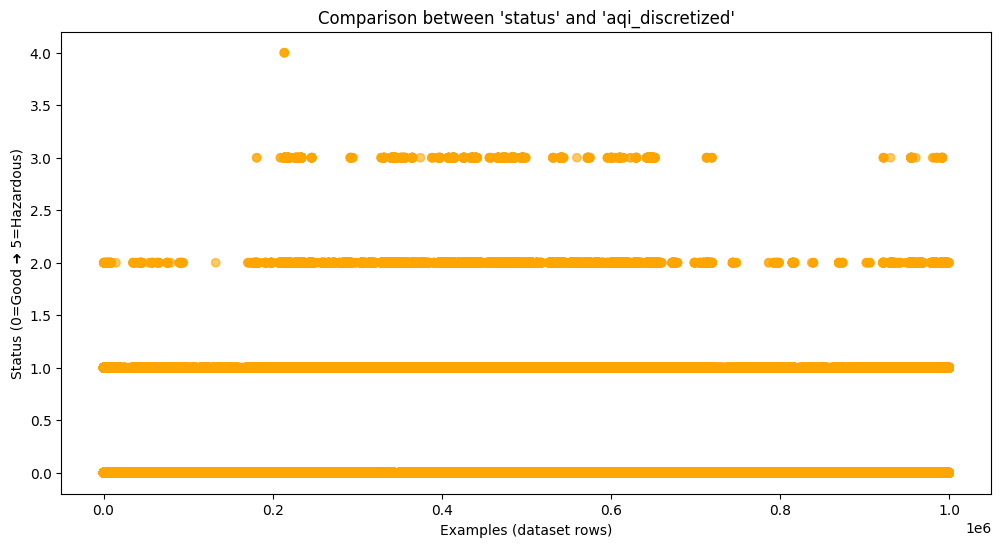

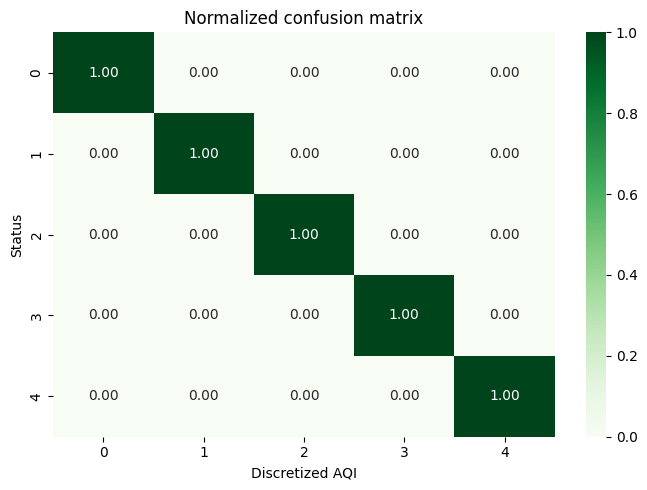

In [ ]:
# Comparison plot
plt.figure(figsize=(12, 6))
colors = df_alt['match'].map({True: 'orange', False: 'red'}) # Set dots' color
plt.scatter(df_alt.index, df_alt['status'], c=colors, alpha=0.6)
plt.xlabel("Examples (dataset rows)")
plt.ylabel("Status (0=Good ➜ 5=Hazardous)")
plt.title("Comparison between 'status' and 'aqi_discretized'")
plt.show()

# Normalized confusion matrix
import seaborn as sns

cm = pd.crosstab(df_alt['status'], df_alt['aqi_discretized'], rownames=['status'], colnames=['aqi_bin'])
cm_norm = cm.div(cm.sum(axis=1), axis=0)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens', vmin=0, vmax=1)
plt.xlabel("Discretized AQI")
plt.ylabel("Status")
plt.title("Normalized confusion matrix")
plt.tight_layout()
plt.show()

#### Interpretation:
There is a perfect match between Status and discretized AQI for all the present classes.


## 5. Visualization of Missing Values  
A useful visualization during the preprocessing phase is the **missing values map**. We use `matplotlib` to create a simple heatmap.  
An analysis of missing values in the dataset was carried out, both in numerical and visual format.


### Count

The first step consists in the numerical count of null values per column, using `df.isnull().sum()`, which returns a table with the total number of cells containing null values (NaN) for each column of the dataframe.


In [ ]:
# Visualization of Missing Values
print("Count of missing values per column:")
print(df.isnull().sum())

Count of missing values per column:
date             0
sitename         0
county           0
aqi              0
pollutant        0
status           0
so2          18405
co           10596
o3           12796
o3_8hr        4613
pm10         15615
pm2.5        12719
no2          17275
nox          17275
no           17276
windspeed    57100
winddirec    57517
co_8hr        2123
pm2.5_avg     5407
pm10_avg      7773
so2_avg       6107
longitude        0
latitude         0
siteid           0
dtype: int64


### Visualization  

The second step concerns the graphical visualization through a `heatmap`, created with Seaborn.  
The heatmap shows:

- **Yellow** → missing cells (NaN)  
- **Dark purple** → complete cells  

Each column is represented on the x-axis, while the row indices appear on the y-axis.  
It does not show the number of missing values, but rather **where they are located in the dataset**.  


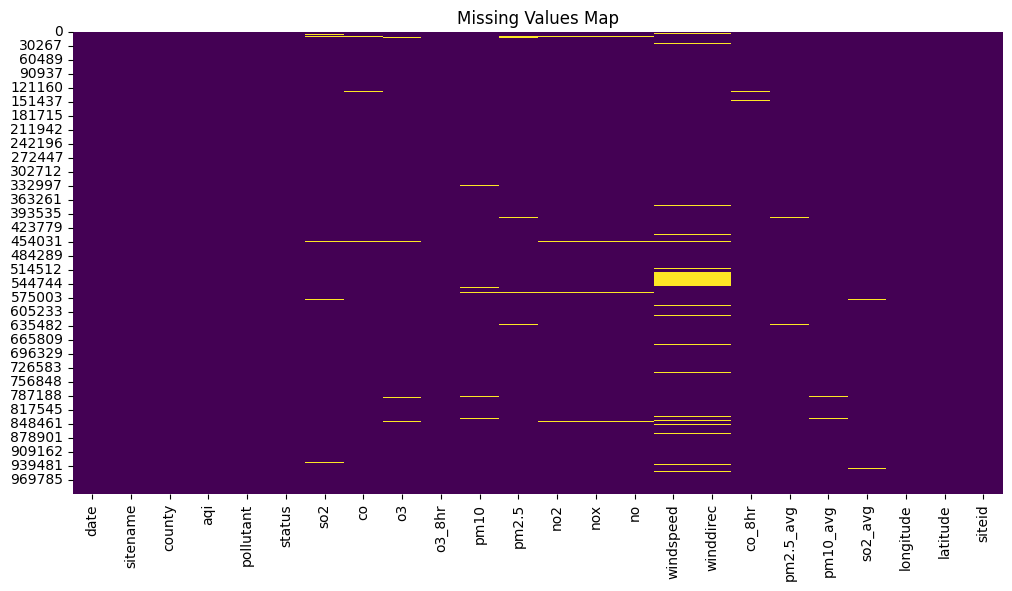

In [ ]:
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Map')
plt.show()

## 6. Interpret the Results
 This step is useful for the subsequent **feature selection**.

  

### a) Dot-plot of features vs status  
- From the `date` column, two numerical columns are extracted: `hour` and `month`.  
- The most relevant variables are selected to be compared with `status`:  
  `['pm2.5_avg', 'pm10_avg', 'no2', 'o3', 'pollutant', 'hour']`  
- For each of them, a dot-plot (scatter plot) is generated:  
  - X-axis = feature value  
  - Y-axis = status (0 = Hazardous … 5 = Good)  


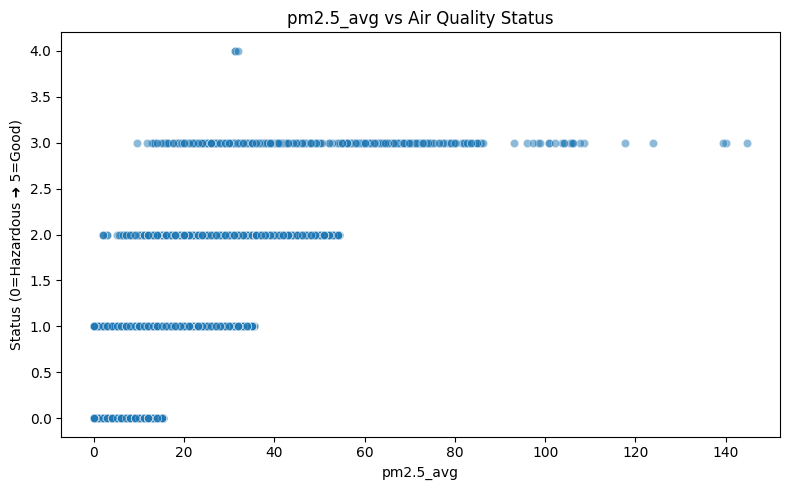

In [ ]:
# Convert 'pm2.5_avg' to numeric and drop rows with missing 'status' or 'pm2.5_avg'
df['pm2.5_avg'] = pd.to_numeric(df['pm2.5_avg'], errors='coerce')
df = df.dropna(subset=['status', 'pm2.5_avg'])

# Direct plot of pm2.5_avg vs status
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['pm2.5_avg'], y=df['status'], alpha=0.5)
plt.title("pm2.5_avg vs Air Quality Status")
plt.xlabel("pm2.5_avg")
plt.ylabel("Status (0=Hazardous ➜ 5=Good)")
plt.tight_layout()
plt.show()

*Scatter plot comment: pm2.5_avg vs Air Quality Status*  

- For low PM2.5 values (0–20), the points are mostly concentrated in status 4–5 (Good or Acceptable quality).  
- For moderate concentrations (20–60), there is a transition toward status 3 (Moderate) and 2 (Unhealthy for Sensitive Groups).  
- High PM2.5 values (> 60) correspond almost exclusively to status 1–2, indicating hazardous or poor air quality.  
- The overall trend highlights an inverse correlation: as PM2.5 increases, the status worsens.  


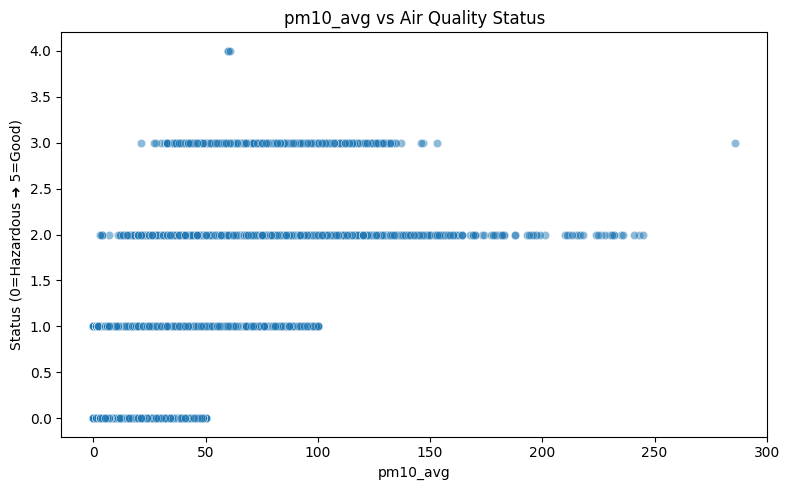

In [ ]:
df['pm10_avg'] = pd.to_numeric(df['pm10_avg'], errors='coerce')
df = df.dropna(subset=['status', 'pm10_avg'])

# Direct plot of pm10_avg vs status
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['pm10_avg'], y=df['status'], alpha=0.5)
plt.title("pm10_avg vs Air Quality Status")
plt.xlabel("pm10_avg")
plt.ylabel("Status (0=Hazardous ➜ 5=Good)")
plt.tight_layout()
plt.show()

*Scatter plot comment: pm10_avg vs Air Quality Status*  

- Here as well, lower PM10 concentrations tend to correspond to higher `status` values, confirming better air quality.  


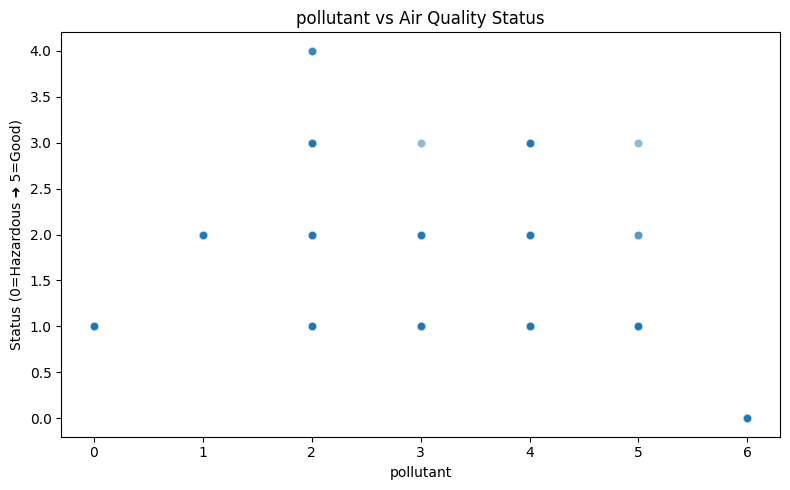

In [ ]:
df = df.dropna(subset=['status', 'pollutant'])

# Direct plot of pollutant vs status
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['pollutant'], y=df['status'], alpha=0.5)
plt.title("pollutant vs Air Quality Status")
plt.xlabel("pollutant")
plt.ylabel("Status (0=Hazardous ➜ 5=Good)")
plt.tight_layout()
plt.show()

*Scatter plot comment: pollutant vs Air Quality Status*  

- In the dot-plot **pollutant vs status**, the correlation in the matrix appears **very low**, confirming that the pollutant type alone does not predict the status well.  
- The `pollutant` feature indicates the type of substance present, but not its measured concentration.  
- To accurately predict the status, it is likely necessary to consider the pollutant concentrations (e.g., pm2.5, no2, co), possibly in combination with each other.  


### b) What to observe in each plot:
   - Which variables (pollutants, averages, temporal variables) show the strongest relationships with **status**  
   - The overall profile of the relationships between environmental variables  


### Exercise
Plot `date`, `hour`, `no2` and `o3` vs status.



In [ ]:
# Convert date values from strings to datetime objects, which Python and Pandas can interpret as real dates

# Define the features to plot

# Generate a scatter plot for each feature


#### Solution

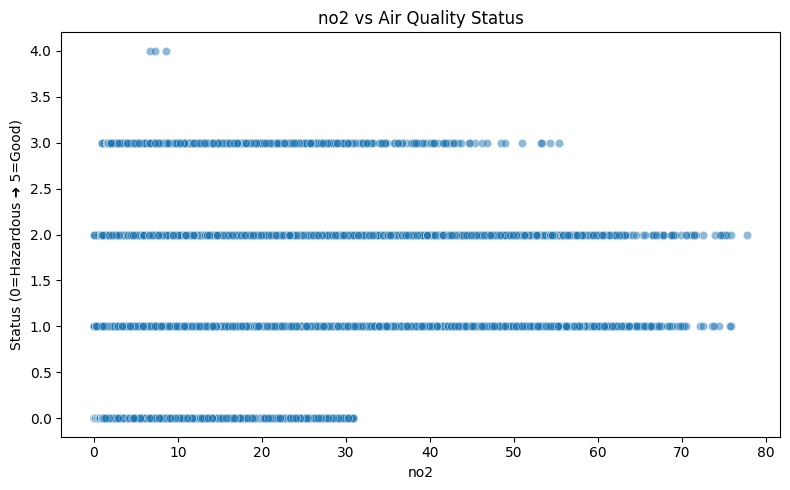

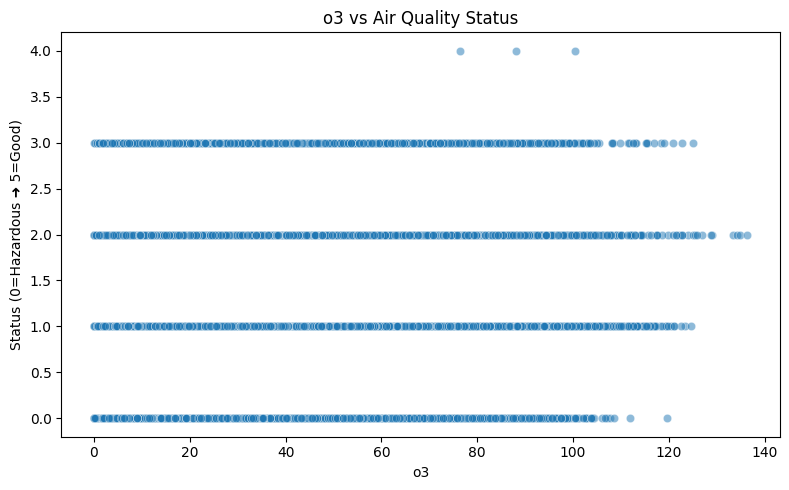

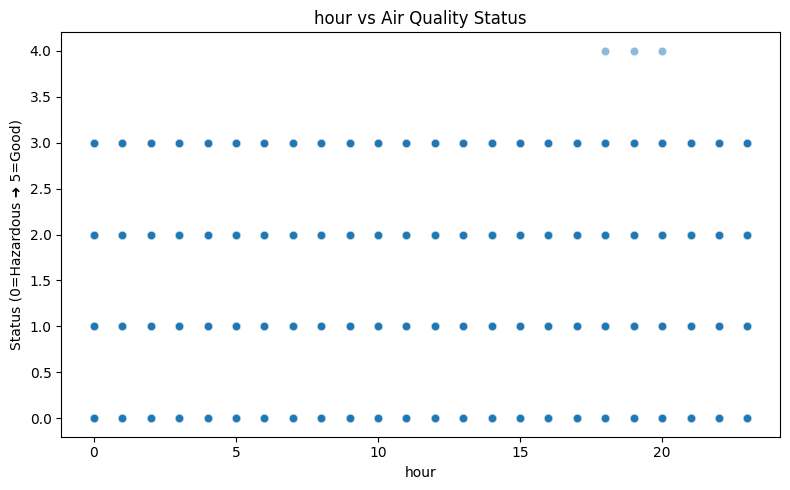

In [ ]:
# Convert date values from strings to datetime objects, which Python and Pandas can interpret as real dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['date'].dt.hour
df['no2'] = pd.to_numeric(df['no2'], errors='coerce')
df['o3'] = pd.to_numeric(df['o3'], errors='coerce')

# Define the features to plot
features_to_plot = ['no2','o3','hour']

# Generate a scatter plot for each feature
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y='status', alpha=0.5)
    plt.title(f"{feature} vs Air Quality Status")
    plt.xlabel(feature)
    plt.ylabel("Status (0=Hazardous ➜ 5=Good)")
    plt.tight_layout()
    plt.show()

### c) *Correlation* Matrix:  
The chart summarizes the correlations between numerical variables (features) and the target variable in a single visualization.  
This allows you to immediately identify which features are most strongly associated with the chosen status.  

For each pair of numerical variables, a value between -1 and +1 represents the degree of `linear correlation`:  
- **Strong positive correlation** (value close to +1)  
- **Strong negative correlation** (value close to –1)  
- **Weak or no correlation** (value close to 0)  



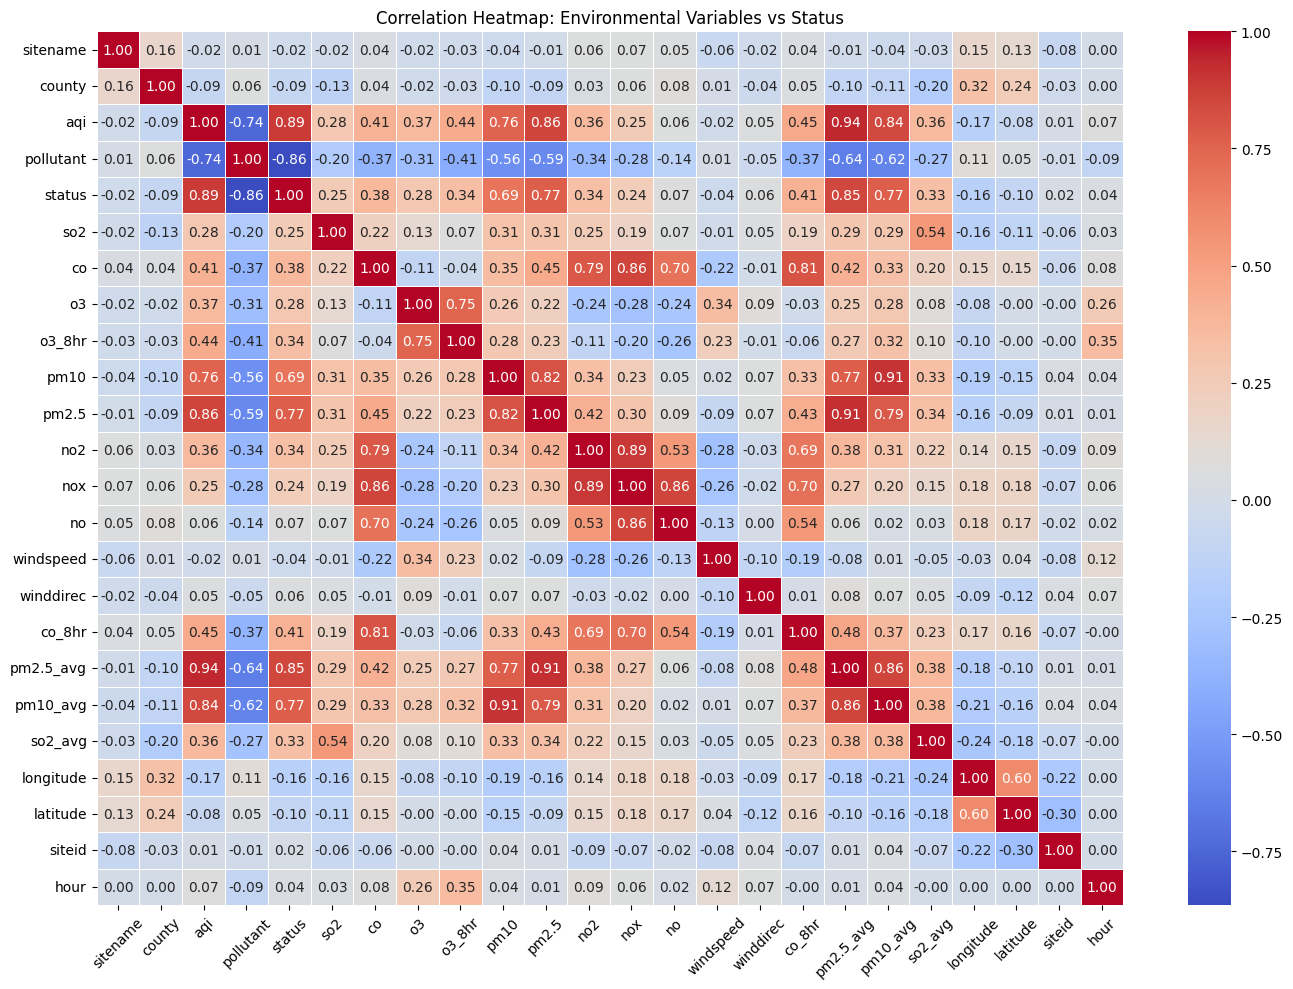

In [ ]:
# Correlation matrix on numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])
import seaborn as sns

correlation_matrix = numeric_df.corr()  # .corr() returns a square table with Pearson correlation coefficients

# Plot heatmap
plt.figure(figsize=(14, 10))  # Define 14×10 inch figure for clear visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Environmental Variables vs Status")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Optimize spacing and margins
plt.show()

#### Example of interpretation:
- status vs pm2.5, strong negative correlation: The coefficient −0.77 indicates that as fine particulate matter (pm2.5) concentrations increase, the “status” tends to worsen.


# Exercise

1. Load the csv file into a DataFrame. Print the shape of the resulting DataFrame.
2. From the resulting DataFrame, remove the columns where the missing values are more than the 5% of the total rows. Print the shape of the resulting DataFrame.
3. From the resulting DataFrame count and remove all the rows where we have at least 3 columns with a missing value. Print the shape of the resulting DataFrame.
4. Write the statistics of the resulting DataFrame.
5. Show the heatmap of the missing values using Seaborn.
6. Plot the aqi vs date for the first 365 rows for the site name 'Hukou'

In [10]:
import pandas as pd
# Loading dataset with read_csv (first 100000 rows in this case)
df = pd.read_csv(file_path,low_memory=False, na_values=['-', 'NA','ND', 'n/a', ''], nrows=1000000)
print("dimensioni originali")
print(df.shape)


for column in df.columns:
  perc = df[column].isnull().mean() * 100
  if perc > 5:
    df.drop(column, axis=1, inplace=True)

#per fare più veloce uso loc che accede a righe e colonne specificate
#isnull crea dataset booleano dove se è null metto true, viene fatta la media con mean per ogni colonna
missing_perc = df.isnull().mean() * 100
df = df.loc[:, missing_perc < 5]

print("dimensioni dopo il drop delle colonne con più del 5% di valori mancanti")
print(df.shape)

(1000000, 25)
(1000000, 21)


In [ ]:
#Rimuovere le colonne o righe all'interno di un ciclo for con inplace=True potrebbe essere
#meno efficiente, specialmente se il DataFrame è molto grande,
#perché drop con inplace=True modifica direttamente il DataFrame ad ogni iterazione.
#Ogni volta che una colonna viene rimossa, l'indice del DataFrame potrebbe essere modificato e questo potrebbe introdurre overhead aggiuntivo nelle operazioni successive.
for rows in df.index.copy():
  if df.isnull().sum(axis=1)[rows] >= 3:
    df.drop(rows, axis=0, inplace=True)
print(df.shape)

#isna restituisce true se trova Nan e false se il valore è valido
#trovo somma valori null per ogni riga (non media per colonna come caso precedente)
#filtro quelli maggiori di 3 (più di 3 valori nan)
#creo dataset booleano con indici di riga e true se ci sono più di 3 valori null per quella riga altrimenti false
#la somma finale conta quante righe soddisfano la condizione (quindi quanti true ho)
count_three_missing = (df.isna().sum(axis=1) >= 3).sum()
print("\nNumber of rows with more than 3 missing values:", count_three_missing)
df_ex = df[(df.isna().sum(axis=1) < 3)]

print(df.describe(include='all'))

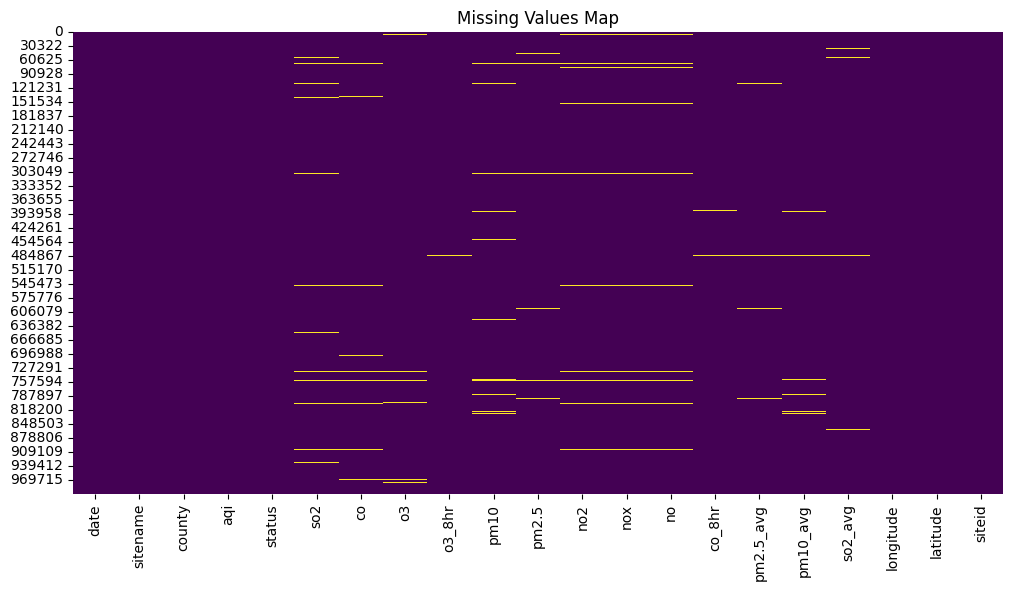

In [13]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Map')
plt.show()

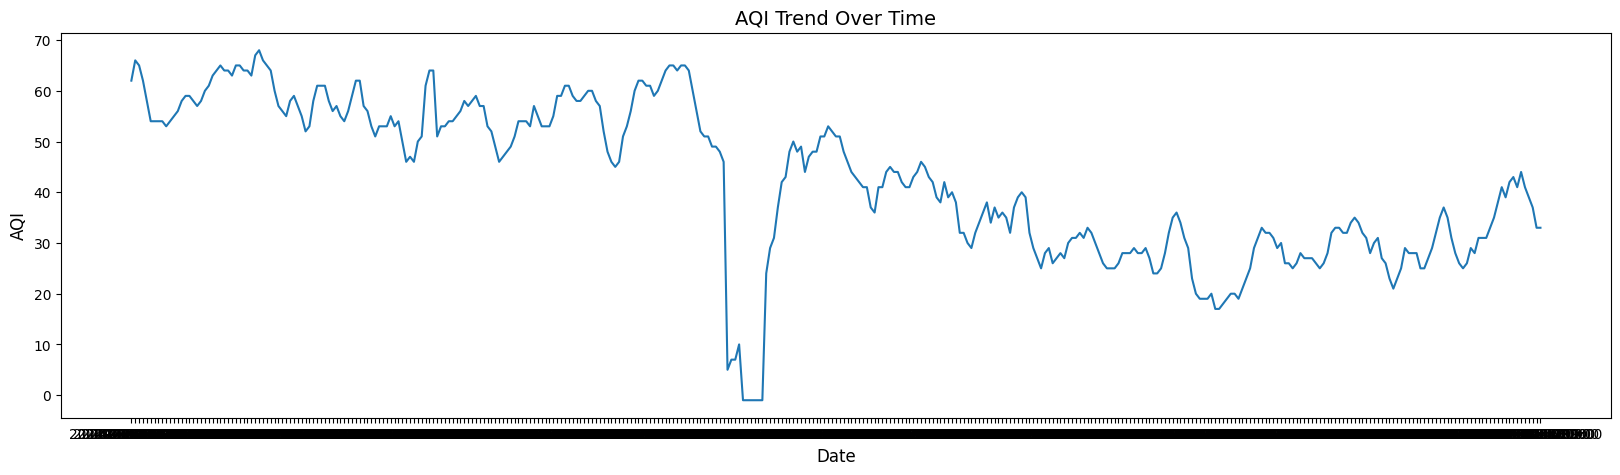

In [14]:
#seleziono sottoinsieme di righe con determinato valore di colonna (doppie parentesi [])
#prendo le prime 365 righe con head
df_6 = df[df['sitename']=='Hukou'].head(365)
plt.figure(figsize=(20, 5))
plt.plot(df_6['date'], df_6['aqi'])
plt.title("AQI Trend Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("AQI", fontsize=12)
plt.show()

## Solution

In [ ]:
# 1. load csv into DataFrame
df_ex = pd.read_csv(file_path,low_memory=False, na_values=['-', 'NA','ND', 'n/a', ''], nrows=1000000)  # Remove nrows to load the entire dataset

In [ ]:
# 2. remove columns with more than 5% missing values
print("\nPercentage of missing values per column (before dropping):")
missing_perc = df_ex.isnull().mean() * 100
print(missing_perc)
print(df_ex.shape)

print("\n\n\nDropping columns... ")
df_ex = df_ex.loc[:, missing_perc < 5]
print(df_ex.shape)


Percentage of missing values per column (before dropping):
date           0.0000
sitename       0.0000
county         0.0000
aqi            0.0348
pollutant     63.8986
status         0.2755
so2            2.1124
co             1.3266
o3             1.5502
o3_8hr         0.7368
pm10           1.8267
pm2.5          1.5370
no2            1.9992
nox            1.9992
no             1.9993
windspeed      5.9652
winddirec      6.0069
unit         100.0000
co_8hr         0.4695
pm2.5_avg      0.8162
pm10_avg       1.0528
so2_avg        0.8350
longitude      0.0000
latitude       0.0000
siteid         0.0000
dtype: float64
(1000000, 25)



Dropping columns... 
(1000000, 21)


In [ ]:
# 3. count the number of rows where thare are at least 3 missing values
count_three_missing = (df_ex.isna().sum(axis=1) >= 3).sum()
print("\nNumber of rows with more than 3 missing values:", count_three_missing)

# 3. remove rows where thare are at least 3 missing values
print("\n\n\nDropping rows... ")
df_ex = df_ex[(df_ex.isna().sum(axis=1) < 3)]
print(df_ex.shape)


Number of rows with more than 3 missing values: 22518



Dropping rows... 
(977482, 21)


In [ ]:
# 4. Print statistics
print("\n\n\nDataset info:")
print(df_ex.info())

print("\nDescriptive statistics:")
print(df_ex.describe(include='all'))

print("\nPercentage of missing values per column (after dropping):")
print(df_ex.isnull().mean() * 100)




Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 977482 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       977482 non-null  object 
 1   sitename   977482 non-null  object 
 2   county     977482 non-null  object 
 3   aqi        977482 non-null  float64
 4   status     977482 non-null  object 
 5   so2        969865 non-null  float64
 6   co         976053 non-null  float64
 7   o3         971130 non-null  float64
 8   o3_8hr     974481 non-null  float64
 9   pm10       967543 non-null  float64
 10  pm2.5      970185 non-null  float64
 11  no2        977482 non-null  float64
 12  nox        977482 non-null  float64
 13  no         977482 non-null  float64
 14  co_8hr     976090 non-null  float64
 15  pm2.5_avg  973333 non-null  float64
 16  pm10_avg   971068 non-null  float64
 17  so2_avg    972413 non-null  float64
 18  longitude  977482 non-null  float64
 19  latitude   

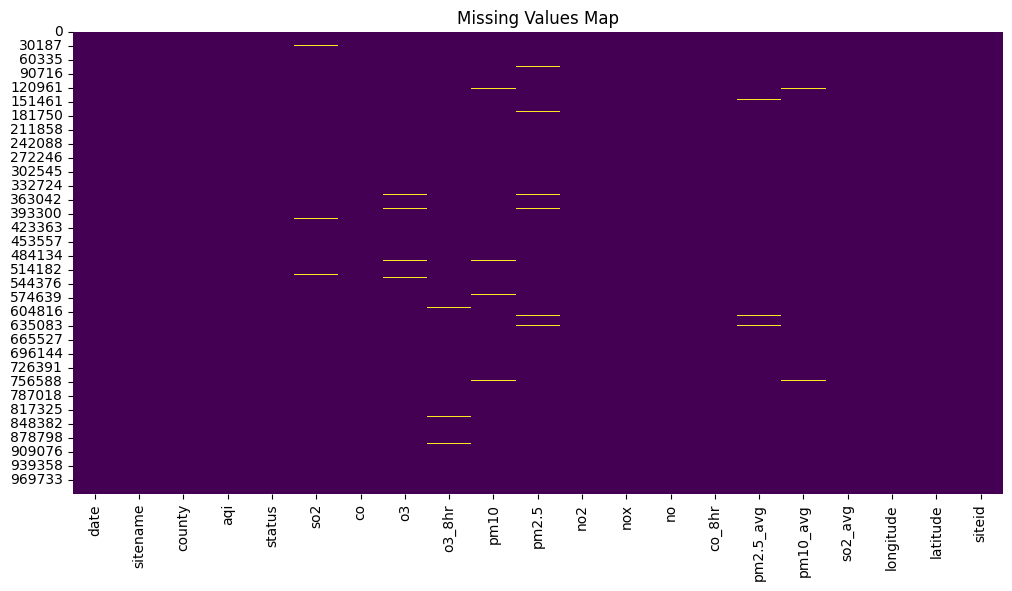

In [ ]:
# 5. Show the heatmap of missinf values
plt.figure(figsize=(12, 6))
sns.heatmap(df_ex.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Map')
plt.show()

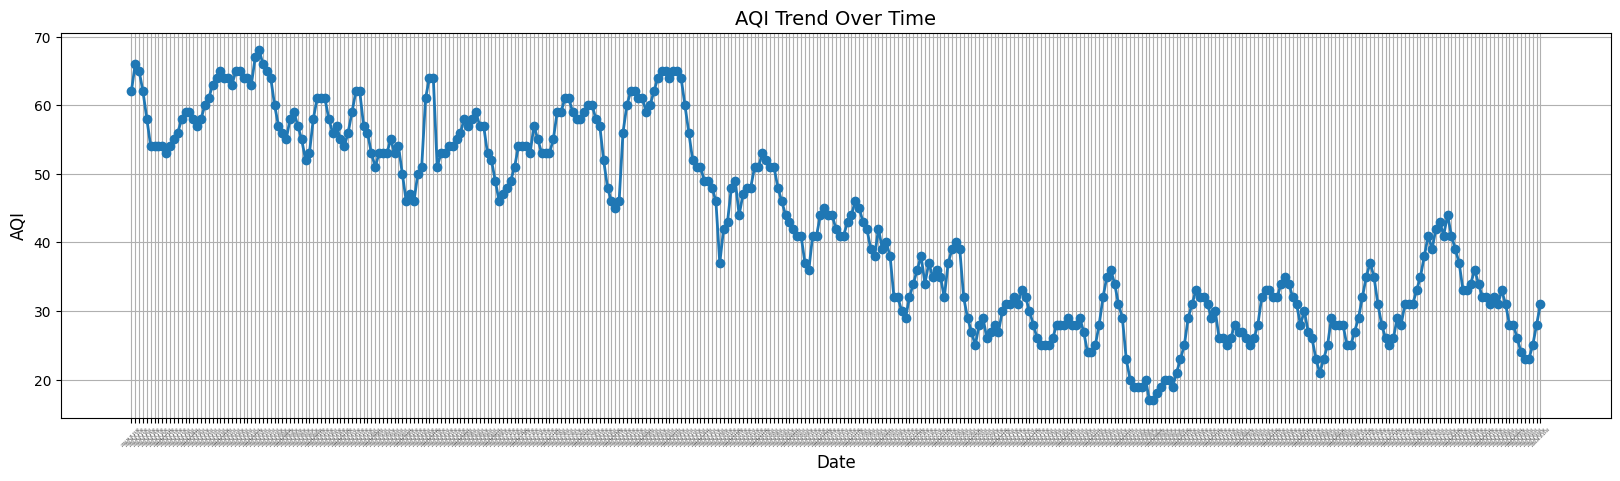

In [ ]:
# 6. Plot aqi vs date

# Take the first 365 rows
df_plot = df_ex[df_ex['sitename'] == 'Hukou']
# Take the first 365 rows
df_plot = df_plot.head(365)

# Plot
plt.figure(figsize=(20, 5))
plt.plot(df_plot['date'], df_plot['aqi'], marker='o', linestyle='-', linewidth=2)

plt.title("AQI Trend Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("AQI", fontsize=12)
plt.xticks(rotation=45, fontsize = 2)
plt.grid(True)

plt.show()